# 평균 필터

### 배치식 : 데이터를 모두 모아서 한꺼번에 계산하는 식
- ex) 평균을 구하는 배치식에서 데이터가 추가될 경우, 다시 데이터를 모두 더해 k+1로 다시 나누어야 함

### 재귀식 : 이전 결과를 재사용하여 값을 계산하는 식

---
## 1. 평균의 재귀식

### 재귀식의 장점
- 이전결과 재사용하여 계산 효율이 좋음
- 데이터가 많을수록 계산량 차이가 늘어나는 경향 (배치식과 비교하여)
- 메모리 저장공간 적게 차지함 (이전평균값, 추가데이터, 데이터개수만 필요하므로)

### 평균배치식을 재귀식으로 바꾸기

### 평균필터 : 평균재귀식을 더 간결하게 표현하기
- 평균필터의 쓰임새
    1. 평균계산
    2. 센서 초기화 : ex) 디지털 체중계 (여러가지 이유로 영점이 바뀌므로, 전원 킬 때 일정시간동안 센서 출력값의 평균으로 영점을 잡는 초기화 작업 --> 평균필터 사용)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

## 평균필터 함수
- 평균필터 파이썬 구현

In [2]:
def avg_filter(k, x_meas, x_avg):
    """평균필터 사용하여 전압 평균 계산"""
    alpha = (k - 1) / k
    x_avg = alpha * x_avg + (1 - alpha) * x_meas
    return x_avg

## 예제 : 전압 측정
- 예제 : 고평균 연구원은 전기차의 배터리를 연구한다. 어는 날 고평균 연구원이 새로 들어온 배터리의 전압을 측정하는데, 잡음이 심해서 잴 때마다 그 값이 달랐다. 그래서 일정 시간동안 측정데이터를 모아서 평균을 내보기로 했다. 전압은 0.2초 간격으로 측정한다.
- GetVolt 함수로 전압값 읽어옴
- GetVolt 함수가 측정하는 전압평균은 14.4V / 잡음은 평균이 0이고 표준편차가 4인 랜덤값

In [3]:
def get_volt():
    """전압 평균"""
    v = np.random.normal(0, 4)  # v: 잡음 평균(노이즈)
    volt_mean = 14.4            # volt_mean: 측정하는 전압의 평균(기준값)
    volt_meas = volt_mean + v   # volt_meas: 식별가능한 전압 평균 [V] (기준값 + 잡음)
    return volt_meas

In [4]:
# Input parameters. (측정시간, 측정간격)
time_end = 10
dt = 0.2

In [5]:
# 값을 저장할 공간(array) 생성
time = np.arange(0, time_end, dt)
n_samples = len(time)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [6]:
x_avg = 0
for i in range(n_samples):
    k = i + 1
    x_meas = get_volt()
    x_avg = avg_filter(k, x_meas, x_avg)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

In [7]:
x_meas_save

array([21.45620938, 16.00062883, 18.31495194, 23.3635728 , 21.87023196,
       10.49088848, 18.20035367, 13.79457117, 13.98712459, 16.04239401,
       14.97617428, 20.21709403, 17.4441509 , 14.88670007, 16.17545293,
       15.73469731, 20.37631629, 13.57936694, 15.65227081, 10.98361704,
        4.18804074, 17.01447438, 17.8577448 , 11.43133992, 23.4790185 ,
        8.5825373 , 14.58303407, 13.6512646 , 20.53111686, 20.27743508,
       15.0197897 , 15.91265008, 10.84885701,  6.47681413, 13.0083514 ,
       15.02539588, 19.32116272, 19.2095194 , 12.85069273, 13.190789  ,
       10.20578814,  8.71992825,  7.57491924, 22.20310158, 12.36139127,
       12.64770279,  9.38881856, 17.50996142,  7.94440861, 13.54903888])

In [8]:
x_avg_save

array([21.45620938, 18.72841911, 18.59059672, 19.78384074, 20.20111898,
       18.58274723, 18.52811958, 17.93642603, 17.49761476, 17.35209268,
       17.1361001 , 17.3928496 , 17.39679585, 17.21750329, 17.14803327,
       17.05969977, 17.25479486, 17.05060442, 16.97700792, 16.67733837,
       16.08260991, 16.12496739, 16.20030554, 16.00159864, 16.30069543,
       16.00384319, 15.95122063, 15.86907935, 16.02983926, 16.17142579,
       16.13427624, 16.12735042, 15.96739607, 15.68826131, 15.61169246,
       15.59540644, 15.69610256, 15.78856089, 15.71323094, 15.65016989,
       15.51738009, 15.355536  , 15.17459143, 15.33433029, 15.26826498,
       15.21129624, 15.08741374, 15.13788348, 14.99107787, 14.96223709])

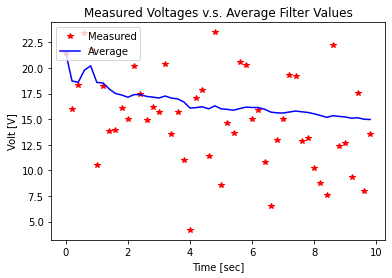

In [9]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Average')
plt.legend(loc='upper left')
plt.title('Measured Voltages v.s. Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Volt [V]')
plt.show()

### 예제풀이 결과

- 측정 전압의 변동은 심하지만, 평균 필터 출력의 추이는 안정
- 데이터가 쌓여가면서 차츰 원래의 평균 전압(14.4)에 근접해 감

## 1장 요약
- 재귀식인 평균필터 사용하면, 직전평균값과 데이터개수만으로 쉽게 평균값 도출 가능
- 데이터가 순차적으로 입력될 경우 효과적 (데이터 실시간 처리 등 여러 면에서 유용)
- 평균을 취함으로써 잡음이 제거되는 효과 있음